<a href="https://colab.research.google.com/github/rizzaesh/Data-Science-Tools/blob/main/intro_with_pandapower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt


# pandapower

In [4]:
net = pp.create_empty_network(name="power")

In [5]:
net

This pandapower network includes the following parameter tables:

In [6]:
pp.create_bus(net=net,name='bus1',vn_kv=-1)

0

In [7]:
net

This pandapower network includes the following parameter tables:
   - bus (1 element)

In [ ]:
pp.create_line(net=net,from_bus=3,to_bus=5,length_km=1,std_type='NAYY 4x50 SE')

7

In [ ]:
pp.create_load(net=net,bus=5,p_mw=2)

5

In [103]:
Net

This pandapower network includes the following parameter tables:
   - bus (110 elements)
   - load (92 elements)
   - gen (50 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (147 elements)
   - trafo (12 elements)
   - poly_cost (54 elements)
   - bus_geodata (110 elements)
 and the following results tables:
   - res_bus (110 elements)
   - res_line (147 elements)
   - res_trafo (12 elements)
   - res_ext_grid (1 element)
   - res_load (92 elements)
   - res_shunt (14 elements)
   - res_gen (50 elements)

In [ ]:
pp.create_motor(net=net, bus=0, pn_mech_mw=1,cos_phi=0.9)

0

In [ ]:
pp.create_gen(net=net,bus=3,p_mw=4,slack=True)

3

In [ ]:
pp.rundcpp(net=net)

In [211]:
Net = pn.case9()

In [352]:
from_bus = Net.line['from_bus']
to_bus = Net.line['to_bus']
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))]

In [219]:
pp.rundcpp(net=Net)

In [190]:
pp.drop_buses(Net, O0, drop_elements=True)

In [98]:
pp.drop_lines(Net,[5,13,15,16,17,168,169])

In [296]:
pp.overloaded_lines(Net)

Int64Index([], dtype='int64')

In [231]:
sum(Net.res_line['p_to_mw'])

46.19565217391308

In [7]:
Net = pn.case30()

In [8]:
Net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [ ]:
pp.create_bus(Net,name=9,vn_kv=0.1)

In [273]:
pp.create_gen(Net,9,400,)

3

In [286]:
pp.create_line(Net,from_bus=4,to_bus=9,length_km=1,std_type='NAYY 4x50 SE')

14

In [9]:
Net.res_bus

,vm_pu,va_degree,p_mw,q_mvar


In [328]:
Net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,230.0,0.0,-230.0,0.0,0.0,0.0,0.384900,0.384900,0.384900,1.0,0.000000,1.0,-7.590545,92.000000
1,105.0,0.0,-105.0,0.0,0.0,0.0,0.175715,0.175715,0.175715,1.0,-7.590545,1.0,-13.125317,42.000000
2,15.0,0.0,-15.0,0.0,0.0,0.0,0.025102,0.025102,0.025102,1.0,-13.125317,1.0,-14.586360,10.000000
3,85.0,0.0,-85.0,0.0,0.0,0.0,0.142246,0.142246,0.142246,1.0,-11.732457,1.0,-14.586360,28.333333
4,100.0,0.0,-100.0,0.0,0.0,0.0,0.167348,0.167348,0.167348,1.0,-14.586360,1.0,-20.361774,66.666667
8,-125.0,0.0,125.0,0.0,0.0,0.0,0.209185,0.209185,0.209185,1.0,-13.678221,1.0,-7.590545,50.000000


In [12]:
current = pd.DataFrame()

In [ ]:
Nett = pn.case30()
line = pd.DataFrame()
from_bus = Nett.line['from_bus']
to_bus = Nett.line['to_bus']
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))]
line["line"] =  edges
edges[pp.overloaded_lines(Net)[0]]

In [427]:
pp.overloaded_lines(Net)[0]

29

Int64Index([31, 32, 34], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([], dtype='int64')


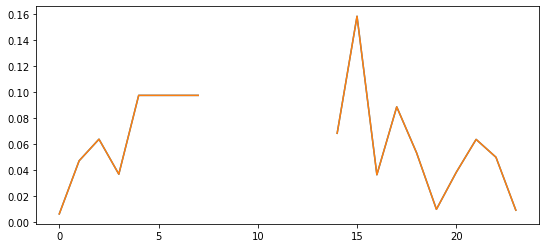

In [16]:
h= [9,5]
Net = pn.case30();
# pp.drop_buses(Net, [23,26,24,25,28,29], drop_elements=True);
pp.drop_buses(Net, h, drop_elements=True);
linka = []
pp.rundcpp(net=Net);
while len(pp.overloaded_lines(Net))!= 0:
    for i in pp.overloaded_lines(Net):
        linka.append(i)
    print(pp.overloaded_lines(Net));
    pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
    pp.rundcpp(net=Net);
print(pp.overloaded_lines(Net));
current['af_r_7'] = Net.res_line['i_ka'];
current['base'].plot(figsize = (9,4));
current['af_r_7'].plot(figsize = (9,4));

In [482]:
linka

[31, 32, 34, 29]

In [45]:
lost = []
for i in range(len(linka)):
    lost.append(line["line"][linka].iloc[i])
lost

[(22, 23), (23, 24), (24, 26), (14, 22)]

In [41]:
line["line"][linka].iloc[1]

(23, 24)

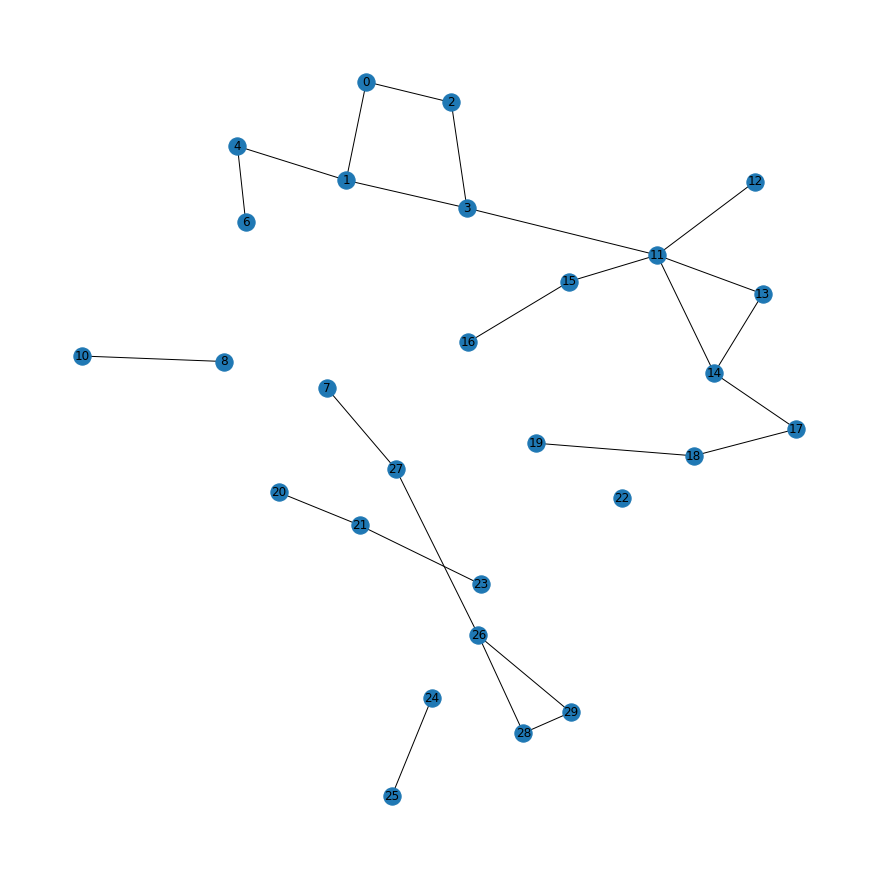

In [22]:
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility
# g.remove_nodes_from([23,26,24,25,28,29])
g.remove_nodes_from(h)
g.remove_edges_from(lost)
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

# 1 - start with clean attitude

In [ ]:
!pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt

create a power network from IEEE traditional power networks

In [154]:
Net = pn.case30() # in this example we use IEEE network known as 30-buses

In [ ]:
Net # we could see diffrent properties of this power network here (before solving current problem)

In [156]:
line = pd.DataFrame()                                           # In here we extract the nodes and
from_bus = Net.line['from_bus']                                # edges from this network for basic
to_bus = Net.line['to_bus']                                    # visualization.
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))] # the final edges is list of all the nodes
line["line"] =  edges

In [157]:
pp.rundcpp(net=Net) #we will solve the current equation

In [158]:
pp.overloaded_lines(Net) # this line will show the overloaded lines

Int64Index([], dtype='int64')

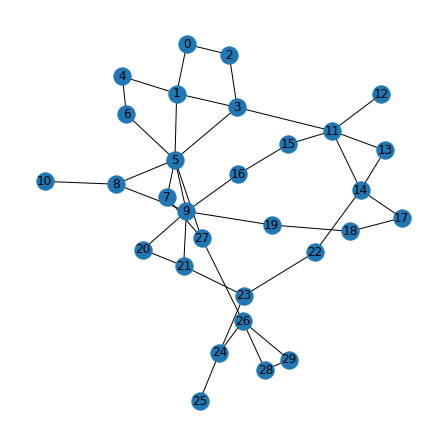

In [159]:
g = nx.Graph()                          # use matplotlib visual
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)    # Seed layout for reproducibility)
plt.figure(figsize=(6,6))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

Example-1: a quick and shor implementation.

Int64Index([20, 31, 32, 34], dtype='int64')
Int64Index([21, 22, 29], dtype='int64')
Int64Index([], dtype='int64')


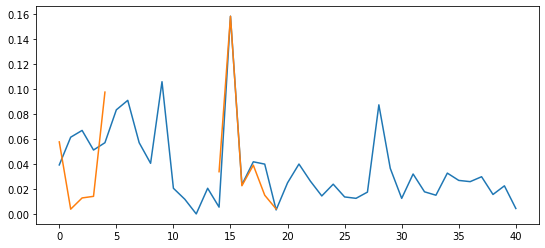

In [177]:
current = pd.DataFrame() # just some visualization
h= [5] # this is list of nodes that we want to remove in first place
# h = remove_edges
Net = pn.case30(); # create a new network each time we run
pp.rundcpp(net=Net); # run the current equation 
current['base'] = Net.res_line['i_ka'];
pp.drop_buses(Net, h, drop_elements=True); # drop the nodes
linka = []  # list o removed lines
pp.rundcpp(net=Net); # run the current equation 
while len(pp.overloaded_lines(Net))!= 0:
    for i in pp.overloaded_lines(Net):
        linka.append(i)
    print(pp.overloaded_lines(Net));
    pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
    pp.rundcpp(net=Net);
print(pp.overloaded_lines(Net));
current['af_r_7'] = Net.res_line['i_ka'];
current['base'].plot(figsize = (9,4));
current['af_r_7'].plot(figsize = (9,4));

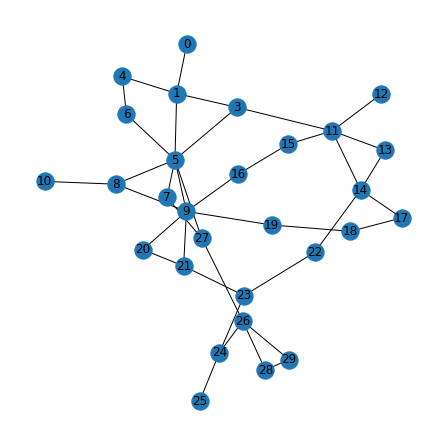

In [172]:
lost = []                                       # list of edges that 
for i in range(len(linka)):                     # must be removed
    lost.append(line["line"][linka].iloc[i])
lost
#-------------------------------------------------------------------------------
g = nx.Graph()                          # use matplotlib visual
g.add_edges_from(edges)
original_nodes = g.nodes()
pos = nx.spring_layout(g, seed=3068)    # Seed layout for reproducibility)
g.remove_nodes_from(h)
g.remove_edges_from(lost)
plt.figure(figsize=(6,6))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

len of the largest component is: 29
presentage of the reminded nodes are: 0.9666666666666667


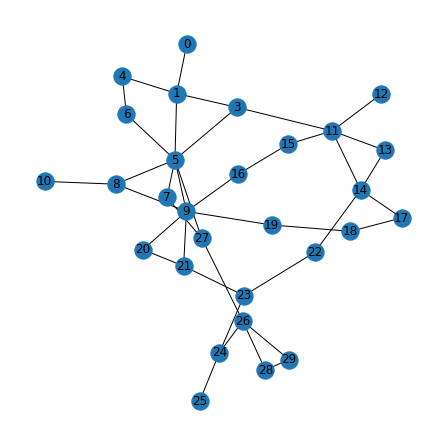

In [173]:
# identify largest connected component
old_nodes = set(g.nodes())
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G0 = g.subgraph(Gcc[0])
New_nodes = set(Gcc[0])
remove_edges = old_nodes-New_nodes
print("len of the largest component is: {}".format(len(New_nodes)))
print("presentage of the reminded nodes are: {}".format(len(New_nodes)/(len(original_nodes)+1)))
#------------------------------------
# plot lorgest component
#------------------------------------
he = remove_edges
pp.drop_buses(Net, he, drop_elements=True); # drop the nodes
g.remove_nodes_from(he)
plt.figure(figsize=(6,6))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

largest component by renadom removing nodes

In [135]:
Net.ext_grid['bus']

0    0
Name: bus, dtype: uint32

In [178]:
import numpy as np
Net = pn.case30(); # create a new network
line = pd.DataFrame()                                           # In here we extract the nodes and
from_bus = Net.line['from_bus']                                # edges from this network for basic
to_bus = Net.line['to_bus']                                    # visualization.
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))] # the final edges is list of all the nodes
line["line"] =  edges
g = nx.Graph()                          # use matplotlib visual
g.add_edges_from(edges)
original_nodes = g.nodes()
#-------------------------------------------------------------------------------
outages = pd.DataFrame()
outage = np.zeros(len(Net.bus))
for j in range(len(Net.bus)):
    if j != int(Net.ext_grid['bus']):
        h= [j] # this is list of nodes that we want to remove in first place
        # h = remove_edges
        Net = pn.case30(); # create a new network each time we run
        pp.drop_buses(Net, h, drop_elements=True); # drop the nodes
        linka = []  # list o removed lines
        pp.rundcpp(net=Net); # run the current equation 
        while len(pp.overloaded_lines(Net))!= 0:
            for i in pp.overloaded_lines(Net):
                linka.append(i)
            pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
            pp.rundcpp(net=Net);
        #-------------------------------------------------------------------------------
        lost = []                                       # list of edges that 
        for i in range(len(linka)):                     # must be removed
            lost.append(line["line"][linka].iloc[i])
        lost
        # print(linka)
        #-------------------------------------------------------------------------------
        g = nx.Graph()                          # use matplotlib visual
        g.add_edges_from(edges)
        # original_nodes = g.nodes()
        pos = nx.spring_layout(g, seed=3068)    # Seed layout for reproducibility)
        g.remove_nodes_from(h)
        g.remove_edges_from(lost)
        #-------------------------------------------------------------------------------
        # identify largest connected component
        old_nodes = set(g.nodes())
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
        # G0 = g.subgraph(Gcc[0])
        New_nodes = set(Gcc[0])
        # print(New_nodes)
        remove_edges = old_nodes-New_nodes
        outage[j] = len(New_nodes)/len(original_nodes)
        print("node {} and amount {}".format(j,outage[j]))
        # print("len of the largest component is: {}".format(len(New_nodes)))
        # print("presentage of the reminded nodes are: {}".format(len(New_nodes)/len(original_nodes)))
    else:outage[j] = 1
outages['otages'] = outage
#------------------------------------
# plot lorgest component
#------------------------------------
# he = remove_edges
# pp.drop_buses(Net, he, drop_elements=True); # drop the nodes
# g.remove_nodes_from(he)
# plt.figure(figsize=(6,6))
# nx.draw(g,pos=pos,with_labels=True)
# plt.show()

[]
node 1 and amount 0.9666666666666667
[]
node 2 and amount 0.9666666666666667
[]
node 3 and amount 0.9666666666666667
[]
node 4 and amount 0.9666666666666667
[20, 31, 32, 34, 21, 22, 29]
node 5 and amount 0.36666666666666664
[]
node 6 and amount 0.9666666666666667
[]
node 7 and amount 0.9666666666666667
[]
node 8 and amount 0.9333333333333333
[]
node 9 and amount 0.9666666666666667
[]
node 10 and amount 0.9666666666666667
[29, 22, 31]
node 11 and amount 0.8
[]
node 12 and amount 0.9666666666666667
[]
node 13 and amount 0.9666666666666667
[31]
node 14 and amount 0.9333333333333333
[]
node 15 and amount 0.9666666666666667
[]
node 16 and amount 0.9666666666666667
[]
node 17 and amount 0.9666666666666667
[]
node 18 and amount 0.9666666666666667
[]
node 19 and amount 0.9666666666666667
[]
node 20 and amount 0.9666666666666667
[]
node 21 and amount 0.9666666666666667
[]
node 22 and amount 0.9666666666666667
[29]
node 23 and amount 0.9333333333333333
[]
node 24 and amount 0.9333333333333333

In [153]:
outages['otages']

0     1.000000
1     0.966667
2     0.966667
3     0.966667
4     0.966667
5     0.366667
6     0.966667
7     0.966667
8     0.933333
9     0.966667
10    0.966667
11    0.800000
12    0.966667
13    0.966667
14    0.933333
15    0.966667
16    0.966667
17    0.966667
18    0.966667
19    0.966667
20    0.966667
21    0.966667
22    0.966667
23    0.933333
24    0.933333
25    0.966667
26    0.900000
27    0.966667
28    0.966667
29    0.966667
Name: otages, dtype: float64

In [138]:
Net

This pandapower network includes the following parameter tables:
   - bus (29 elements)
   - load (19 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (39 elements)
   - poly_cost (6 elements)
   - bus_geodata (29 elements)
 and the following results tables:
   - res_bus (29 elements)
   - res_line (39 elements)
   - res_ext_grid (1 element)
   - res_load (19 elements)
   - res_shunt (2 elements)
   - res_gen (5 elements)

# Graph

# Implemetation

In [134]:
import matplotlib.pyplot as plt


In [ ]:
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility
g.remove_node(h)
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

In [ ]:
edges

In [353]:
g = nx.Graph()
g.add_edges_from(edges)


In [367]:
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility

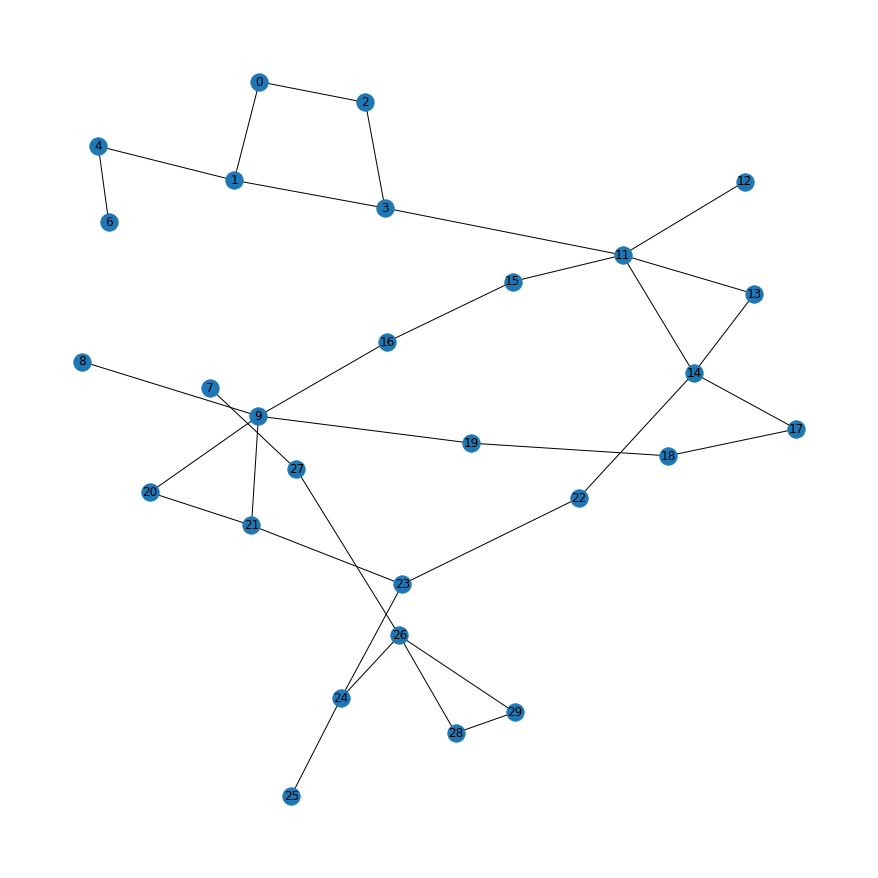

In [368]:
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

In [ ]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
Gcc

In [185]:
O0 = Gcc[1]
O0

{7, 8, 9, 25, 29, 37, 62, 63, 64}

In [182]:
O1 = list(Net.gen['bus'])

In [189]:
for i in O1:
    if i in O0:
        print(i)

7
9
25
64


In [ ]:
largest_cc = max(nx.connected_components(g), key=len)
largest_cc

In [161]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G0 = g.subgraph(Gcc[0])

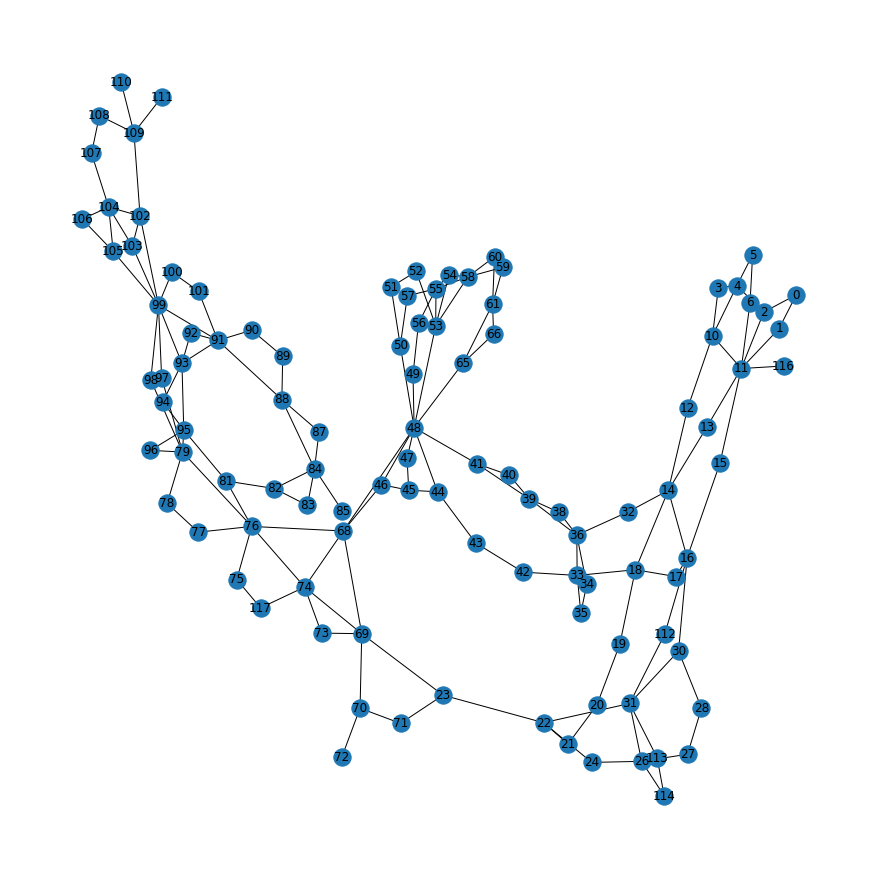

In [168]:
plt.figure(figsize=(12,12))
nx.draw(G0,pos=pos,with_labels=True)
plt.show()

In [158]:
G = nx.Graph()
G.add_edges_from(edges)
pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("with lenght X we have y path")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

# print(f"radius: {nx.radius(G)}")
# print(f"diameter: {nx.diameter(G)}") #maximum lenght
# print(f"eccentricity: {nx.eccentricity(G)}")
# print(f"center: {nx.center(G)}")
# print(f"periphery: {nx.periphery(G)}") # nodes with max lenght
# print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility

# options = {
#     "node_color": "#A0CBE2",
#     "edge_color": "#A4CBE2",
#     "width": 4,
#     "edge_cmap": plt.cm.Blues,
#     "with_labels": False,
# }
# nx.draw(G, pos=pos, **options)

nx.draw(G, pos=pos, with_labels=True,width=1,node_size=2)
plt.show()
# atlas(G)


source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 11: 2, 4: 2, 3: 3, 5: 3, 6: 3, 10: 3, 13: 3, 15: 3, 116: 3, 12: 4, 14: 4, 16: 4, 32: 5, 17: 5, 18: 5, 112: 5, 30: 5, 33: 6, 36: 6, 19: 6, 28: 6, 31: 6, 34: 7, 35: 7, 38: 7, 39: 7, 42: 7, 113: 7, 20: 7, 22: 7, 26: 7, 27: 7, 40: 8, 41: 8, 43: 8, 114: 8, 21: 8, 23: 8, 24: 8, 69: 9, 71: 9, 44: 9, 48: 9, 65: 10, 68: 10, 70: 10, 73: 10, 74: 10, 45: 10, 46: 10, 47: 10, 49: 10, 50: 10, 53: 10, 51: 11, 52: 11, 54: 11, 55: 11, 56: 11, 57: 11, 58: 11, 61: 11, 66: 11, 72: 11, 76: 11, 117: 11, 59: 12, 60: 12, 75: 12, 77: 12, 79: 12, 81: 12, 96: 13, 97: 13, 98: 13, 78: 13, 82: 13, 95: 13, 99: 14, 83: 14, 84: 14, 93: 14, 94: 14, 100: 15, 102: 15, 103: 15, 105: 15, 85: 15, 87: 15, 88: 15, 91: 15, 92: 15, 101: 16, 104: 16, 106: 16, 109: 16, 89: 16, 90: 16, 107: 17, 108: 17, 110: 17, 111: 17} 
1 {1: 0, 0: 1, 11: 1, 2: 2, 6: 2, 10: 2, 13: 2, 15: 2, 116: 2, 3: 3, 4: 3, 5: 3, 12: 3, 14: 3, 16: 3, 32: 4, 17: 4, 18: 4, 112: 4, 30: 4, 33: 5, 36: 5, 19: 5, 2

NetworkXError: ignored